# 1. Samsung

In [1]:
import pandas as pd
from tqdm import tqdm

df_samsung = pd.read_csv('../2024_Data/samsung/samsung_security_updates_combined.csv')
df_samsung.head()

,model,csc,csc_code,device_id,carrier_country,country,carrier,region,subregion,build_number,android_version,release_date,security_patch_level,device,model_url
0,sm-w2020,CHC,10328191220,sm-w2020/chc,China (Open China),China,Open China,Asia,Eastern Asia,w2020zcu3fwc2,s(android 12),4/11/23,2/1/23,w20 5g,https://doc.samsungmobile.com/SM-W2020/0103281...
1,sm-w2020,CHC,10328191220,sm-w2020/chc,China (Open China),China,Open China,Asia,Eastern Asia,w2020zcu3fwa1,s(android 12),1/18/23,12/1/22,w20 5g,https://doc.samsungmobile.com/SM-W2020/0103281...
2,sm-w2020,CHC,10328191220,sm-w2020/chc,China (Open China),China,Open China,Asia,Eastern Asia,w2020zcu3fvj7,s(android 12),11/16/22,9/1/22,w20 5g,https://doc.samsungmobile.com/SM-W2020/0103281...
3,sm-w2020,CHC,10328191220,sm-w2020/chc,China (Open China),China,Open China,Asia,Eastern Asia,w2020zcu3fvj3,s(android 12),10/27/22,6/1/22,w20 5g,https://doc.samsungmobile.com/SM-W2020/0103281...
4,sm-w2020,CHC,10328191220,sm-w2020/chc,China (Open China),China,Open China,Asia,Eastern Asia,w2020zcu3fvf5,s(android 12),7/7/22,4/1/22,w20 5g,https://doc.samsungmobile.com/SM-W2020/0103281...


In [2]:
df_samsung['release_date'] = pd.to_datetime(df_samsung['release_date'], format='%m/%d/%y', errors='coerce')
df_samsung['security_patch_level'] = pd.to_datetime(df_samsung['security_patch_level'], format='%m/%d/%y', errors='coerce')

df_samsung = df_samsung[df_samsung['release_date'] < '2024-06-01']

df_samsung = df_samsung.sort_values(by='release_date', ascending=True)
print(df_samsung['release_date'].iloc[0])
print(df_samsung['release_date'].iloc[-1])

2015-04-10 00:00:00
2024-05-31 00:00:00


## 1.1 Feature extraction for all pairs

In [3]:
df_knox_models = pd.read_csv('../2024_Data/samsung/knox_models.csv')
df_csc = pd.read_csv('../2024_Data/samsung/csc_list.csv')

df_knox_models['device'] = df_knox_models['device'].str.lower()
df_knox_models['model'] = df_knox_models['model'].str.lower()
df_csc['CSC'] = df_csc['CSC'].str.lower()

# Initialize the columns with appropriate data types
df_samsung['device_type'] = None
df_samsung['AER'] = None
df_samsung['platform'] = None
df_samsung['iso_code'] = None

# Wrap the loop with tqdm for progress bar
pbar = tqdm(df_samsung.index, desc='Processing Records', dynamic_ncols=True)
for idx in pbar:
    device_id = df_samsung.loc[idx, 'device_id']
    model, csc = device_id.split('/')
    
    knox_row = df_knox_models[df_knox_models['model'] == model]
    csc_row = df_csc[df_csc['CSC'] == csc]

    if not knox_row.empty:
        df_samsung.loc[idx, 'device_type'] = knox_row['device_type'].values[0]
        df_samsung.loc[idx, 'AER'] = bool(knox_row['AER'].values[0])
        df_samsung.loc[idx, 'platform'] = knox_row['platform'].values[0]

    if not csc_row.empty:
        df_samsung.loc[idx, 'iso_code'] = csc_row['iso_code'].values[0]

Processing Records: 100%|████████████| 523328/523328 [04:31<00:00, 1926.68it/s]


In [4]:
df_samsung.head()

,model,csc,csc_code,device_id,carrier_country,country,carrier,region,subregion,build_number,android_version,release_date,security_patch_level,device,model_url,device_type,AER,platform,iso_code
385502,sm-g920s,SKC,8161119,sm-g920s/skc,Korea (SK Telecom),Korea,SK Telecom,Asia,Eastern Asia,g920sksu1aod5,lollipop(android 5.0.2),2015-04-10,NaT,galaxy s6,https://doc.samsungmobile.com/SM-G920S/0000081...,smartphone,False,Android - Secured by Knox,KOR
385979,sm-g925s,SKC,11161119,sm-g925s/skc,Korea (SK Telecom),Korea,SK Telecom,Asia,Eastern Asia,g925sksu1aod5,lollipop(android 5.0.2),2015-04-10,NaT,galaxy s6 edge,https://doc.samsungmobile.com/SM-G925S/0000111...,smartphone,False,Android - Secured by Knox,KOR
385501,sm-g920s,SKC,8161119,sm-g920s/skc,Korea (SK Telecom),Korea,SK Telecom,Asia,Eastern Asia,g920sksu1aod8,lollipop(android 5.0.2),2015-04-29,NaT,galaxy s6,https://doc.samsungmobile.com/SM-G920S/0000081...,smartphone,False,Android - Secured by Knox,KOR
385978,sm-g925s,SKC,11161119,sm-g925s/skc,Korea (SK Telecom),Korea,SK Telecom,Asia,Eastern Asia,g925sksu1aod8,lollipop(android 5.0.2),2015-04-29,NaT,galaxy s6 edge,https://doc.samsungmobile.com/SM-G925S/0000111...,smartphone,False,Android - Secured by Knox,KOR
385977,sm-g925s,SKC,11161119,sm-g925s/skc,Korea (SK Telecom),Korea,SK Telecom,Asia,Eastern Asia,g925sksu1aodc,lollipop(android 5.0.2),2015-05-08,NaT,galaxy s6 edge,https://doc.samsungmobile.com/SM-G925S/0000111...,smartphone,False,Android - Secured by Knox,KOR


In [5]:
df_samsung['release_date'] = pd.to_datetime(df_samsung['release_date'], errors='coerce')
df_samsung['security_patch_level'] = pd.to_datetime(df_samsung['security_patch_level'], errors='coerce')

In [6]:
unique_ids = df_samsung['device_id'].unique()

# Wrap the loop with tqdm for progress bar
pbar = tqdm(unique_ids, desc='Processing Records', dynamic_ncols=True)

group_by_device_id = []

for idx, device_id in enumerate(pbar):
    df_device_id = df_samsung[df_samsung['device_id'] == device_id]
    
    model, csc = device_id.split('/')
    
    device = df_device_id['device'].dropna().unique()
    device_type = df_device_id['device_type'].dropna().unique()
    model_url = df_device_id['model_url'].dropna().unique()
    country = df_device_id['country'].dropna().unique()
    AER = df_device_id['AER'].dropna().unique()
    # Convert boolean array AER to strings
    AER = list(map(str, AER))
    
    platform = df_device_id['platform'].dropna().unique()
    carrier_country = df_device_id['carrier_country'].dropna().unique()
    carrier = df_device_id['carrier'].dropna().unique()
    iso_code = df_device_id['iso_code'].dropna().unique()
    region = df_device_id['region'].dropna().unique()
    subregion = df_device_id['subregion'].dropna().unique()
    
    android_versions = df_device_id['android_version'].dropna().unique()
    android_versions = list(map(str, android_versions))

    first_version = df_device_id.sort_values('release_date', ascending=False)['android_version'].iat[-1]
    last_version = df_device_id.sort_values('release_date', ascending=False)['android_version'].iat[0]

    # Extract SPLs for the unique pair
    SPL_dates = df_device_id['security_patch_level']
    
    # Calculate other features from SPL array for the unique pair
    first_SPL = SPL_dates.min()
    last_SPL = SPL_dates.max()
    SPL_duration = last_SPL - first_SPL
    SPL_count = len(SPL_dates)
    SPL_freq = SPL_duration.days / SPL_count if SPL_count > 0 else 0

    # Extract release dates for the unique pair
    release_dates = df_device_id['release_date']
    
    # Calculate other features from release dates array for the unique pair
    first_release_date = release_dates.min()
    last_release_date = release_dates.max()
    release_date_duration = release_dates.max() - release_dates.min()
    release_count = len(release_dates)
    avg_release_freq = release_date_duration.days / release_count if release_count > 0 else 0
    
    # Calculate average delay in the release dates and SPL dates
    avg_release_delay = (df_device_id['release_date'] - df_device_id['security_patch_level']).mean().days
    
    # Create the final array
    group_by_device_id.append({
        'device_id': device_id,
        'device': ','.join(device) if device.size > 0 else '',
        'model': model,
        'csc': csc,
        'device_type': ','.join(device_type) if device_type.size > 0 else '',
        'AER': ','.join(AER) if AER else '',
        'platform': ','.join(platform) if platform.size > 0 else '',
        'carrier_country': ','.join(carrier_country) if carrier_country.size > 0 else '',
        'carrier': ','.join(carrier) if carrier.size > 0 else '',
        'country': ','.join(country) if country.size > 0 else '',
        'iso_code': ','.join(iso_code) if iso_code.size > 0 else '',
        'region': ','.join(region) if region.size > 0 else '',
        'subregion': ','.join(subregion) if subregion.size > 0 else '',
        'android_versions': android_versions,
        'android_versions_count': len(android_versions),
        'first_version': first_version,
        'last_version': last_version,
        'first_SPL': first_SPL,
        'last_SPL': last_SPL,
        'SPL_duration': SPL_duration,
        'release_date_duration': release_date_duration,
        'SPL_count': SPL_count,
        'release_count': release_count,
        'SPL_freq': SPL_freq,
        'avg_release_freq': avg_release_freq,
        'first_release_date': first_release_date,
        'last_release_date': last_release_date,
        'avg_release_delay': avg_release_delay,
        'model_url': ','.join(model_url) if model_url.size > 0 else ''
    })

df_final_samsung = pd.DataFrame(group_by_device_id)
df_final_samsung.to_csv('../2024_Data/samsung/samsung_updates_by_deviceID.csv',index=False)
df_final_samsung.head()

Processing Records: 100%|████████████████| 24916/24916 [10:20<00:00, 40.16it/s]


,device_id,device,model,csc,device_type,AER,platform,carrier_country,carrier,country,...,SPL_duration,release_date_duration,SPL_count,release_count,SPL_freq,avg_release_freq,first_release_date,last_release_date,avg_release_delay,model_url
0,sm-g920s/skc,galaxy s6,sm-g920s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,Korea,...,0 days,2687 days,27,27,0.0,99.518519,2015-04-10,2022-08-18,832.0,https://doc.samsungmobile.com/SM-G920S/0000081...
1,sm-g925s/skc,galaxy s6 edge,sm-g925s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,Korea,...,0 days,2687 days,25,25,0.0,107.480000,2015-04-10,2022-08-18,832.0,https://doc.samsungmobile.com/SM-G925S/0000111...
2,sm-g9209/ctc,galaxy s6,sm-g9209,ctc,smartphone,False,Android - Secured by Knox,China (China Telecom),China Telecom,China,...,0 days,1239 days,14,14,0.0,88.500000,2015-05-15,2018-10-05,34.0,https://doc.samsungmobile.com/SM-G9209/0000081...
3,sm-p355y/bri,"galaxy tab a 8"" w/ s-pen",sm-p355y,bri,tablet,False,Android - Secured by Knox,Taiwan,No-carrier,Taiwan,...,NaT,1245 days,8,8,NaN,155.625000,2015-05-27,2018-10-23,NaN,https://doc.samsungmobile.com/SM-P355Y/0000721...
4,sm-p355y/tgy,"galaxy tab a 8"" w/ s-pen",sm-p355y,tgy,tablet,False,Android - Secured by Knox,Hong Kong,No-carrier,Hong Kong,...,NaT,1245 days,8,8,NaN,155.625000,2015-05-27,2018-10-23,NaN,https://doc.samsungmobile.com/SM-P355Y/0000711...


- Saving the last OS and last security update dates for unpatched analysis

In [7]:
import pandas as pd

# df_final_samsung = pd.read_csv('../2024_Data/samsung/samsung_updates_by_deviceID.csv')

df_final_samsung_new= df_final_samsung.rename(columns={
    'last_version': 'last_android_version', 
    'last_release_date': 'last_update_date',
    'device_id': 'id'
},inplace=False)

df_final_samsung_new['last_android_version'] = df_final_samsung_new['last_android_version'].str.extract(r'\((android [^)]+)\)')

def process_versions(version):
    if isinstance(version, str):
        parts = version.split()
        if len(parts) == 2 and len(parts[1].split('.')) == 1:
            return parts[0] + ' ' + parts[1] + '.0'
        else:
            return version
    else:
        return version

# Apply the function to the column
df_final_samsung_new['last_android_version'] = df_final_samsung_new['last_android_version'].apply(process_versions)

df_final_samsung_new[['id','device', 'country', 'region',
                      'last_android_version',
                      'last_update_date']].to_csv('../2024_Data/samsung/samsung_unpatched_devices.csv',index=False)

In [8]:
print(len(df_final_samsung_new))

24916


In [9]:
len(df_final_samsung['device'].unique())

531

In [10]:
len(df_final_samsung_new['device'].unique())

531

### Dataset Stats

In [11]:
print('=========Queried==========')
print('unique csc: {}'.format(len(df_csc['CSC'].unique())))
print('unique model: {}'.format(len(df_knox_models['model'].unique())))
print('total queired pair: {}'.format(len(df_csc['CSC'].unique())*len(df_knox_models['model'].unique())))

print('=========Found==========')
print('Total Updates Found: {}'.format(len(df_samsung.index)))
print('Unique Pair: {}'.format(len(df_samsung['device_id'].unique())))
print('Unique Model: {}'.format(len(df_samsung['model'].unique())))
print('Unique Device: {}'.format(len(df_samsung['device'].unique())))
print('Unique CSC: {}'.format(len(df_samsung['csc'].unique())))
print('Unique Country: {}'.format(len(df_samsung['country'].unique())))
print('Unique Carrier: {}'.format(len(df_samsung['carrier'].unique())-1)) ## '-1' is for 'no-carrier'
print('First date: {}'.format(df_samsung['release_date'].min()))
print('Last date: {}'.format(df_samsung['release_date'].max()))

# #With SPL
# print('===================')
print('Announcements with SPL: {}'.format(len(df_samsung[~df_samsung['security_patch_level'].isnull()].index)))

# #Without SPL
# print('===================')
print('Announcements without SPL: {}'.format(len(df_samsung[df_samsung['security_patch_level'].isnull()].index)))

=========Queried==========
unique csc: 314
unique model: 1728
total queired pair: 542592
=========Found==========
Total Updates Found: 523328
Unique Pair: 24916
Unique Model: 1247
Unique Device: 423
Unique CSC: 273
Unique Country: 97
Unique Carrier: 109
First date: 2015-04-10 00:00:00
Last date: 2024-05-31 00:00:00
Announcements with SPL: 512084
Announcements without SPL: 11244


## 1.2 Initial Data Analysis

 ### Update Count

In [12]:
df_final_samsung['release_count'].mean()

21.003692406485793

In [13]:
df_final_samsung['android_versions_count'].mean()

2.5711189597046076

<Axes: >

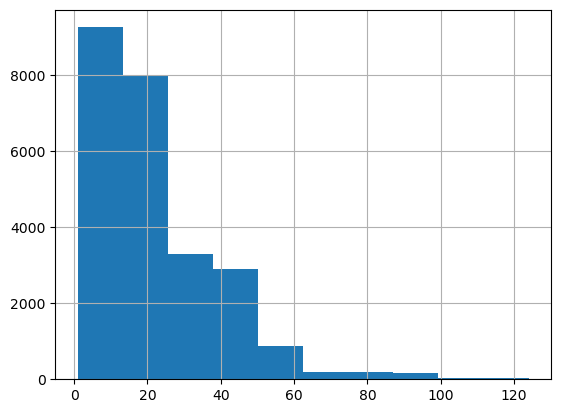

In [14]:
df_final_samsung['release_count'].hist()

In [15]:
grouped = df_final_samsung.groupby('device')
df_filtered = grouped.filter(lambda x: x['release_count'].mean() >= 38)

print('Total unique devices receive more than 38 updates:', len(df_filtered['device'].unique()))
print()

top_devices_counts = df_filtered['device'].value_counts().head(10)
print(top_devices_counts)


Total unique devices receive more than 38 updates: 56

device
galaxy s10+                   217
galaxy s10                    217
galaxy s10e                   210
galaxy s21 5g                 194
galaxy a8 (2018),galaxy a8    175
galaxy s21+ 5g                166
galaxy s21 ultra 5g           165
galaxy s20                    159
galaxy s20+                   145
galaxy note20 ultra 5g        134
Name: count, dtype: int64


In [16]:
df_filtered[['device','first_version']].value_counts().head(10)

device                      first_version        
galaxy s10+                 pie(android 9)           217
galaxy s10                  pie(android 9)           217
galaxy s10e                 pie(android 9)           210
galaxy s21 5g               r(android 11)            194
galaxy a8 (2018),galaxy a8  nougat(android 7.1.1)    172
galaxy s21+ 5g              r(android 11)            166
galaxy s21 ultra 5g         r(android 11)            165
galaxy s20                  q(android 10)            159
galaxy s20+                 q(android 10)            145
galaxy note20 ultra 5g      q(android 10)            132
Name: count, dtype: int64

In [17]:
df_filtered['first_version'].value_counts()

first_version
q(android 10)            1750
pie(android 9)           1014
r(android 11)             651
nougat(android 7.1.1)     172
s(android 12)              37
oreo(android 8.0.0)         4
t(android 13)               2
Name: count, dtype: int64

In [18]:
df_filtered['android_versions_count'].value_counts()

android_versions_count
4    3008
3     460
2     111
1      51
Name: count, dtype: int64

 ### Support Duration

In [19]:
df_final_samsung['release_date_duration'] = pd.to_timedelta(df_final_samsung['release_date_duration'])

mean_duration = df_final_samsung['release_date_duration'].mean()

print(mean_duration)

858 days 22:38:41.014609072


In [20]:
grouped = df_final_samsung.groupby(['device'])

df_filtered = grouped.filter(lambda x: x['release_date_duration'].dt.days.mean()>4*365)

print('Unique number of devices with a support deration of over 4 years:', len(df_filtered['device'].unique()))
df_filtered['device'].unique()

Unique number of devices with a support deration of over 4 years: 29


array(['galaxy tab a plus 9.7', 'galaxy a5 (2015),galaxy a5 ⑥',
       'galaxy a7 (2016)', 'galaxy tab e 8.0"', 'galaxy on7 (2015)',
       'galaxy a8 (2016)',
       'galaxy tab a 10.1" w/ s-pen,galaxy tab a⑥ with s pen',
       'galaxy s8+', 'galaxy s8', 'galaxy note fe', 'galaxy a7 (2017)',
       'galaxy note8', 'galaxy s9', 'galaxy s9+',
       'galaxy s8 lite,galaxy s 轻奢版', 'galaxy a8 star', 'galaxy s10',
       'galaxy a70', 'galaxy a20e', 'galaxy note10,galaxy note 10',
       'galaxy note 10,galaxy note10', 'galaxy m10s', 'galaxy s20 5g',
       'galaxy s20+ 5g', 'galaxy s20 ultra 5g,galaxy s20 ultra',
       'galaxy s20 uitra 5g,galaxy s20 ultra',
       'galaxy s20 ultra,galaxy s20 uitra 5g',
       'galaxy s20 ultra,galaxy s20 ultra 5g', 'galaxy s20+'],
      dtype=object)

In [21]:
grouped = df_final_samsung.groupby(['device'])

df_filtered = grouped.filter(lambda x: x['release_date_duration'].dt.days.mean()>5*365)

print('Unique number of devices with a support deration of over 4 years:', len(df_filtered['device'].unique()))

df_filtered['device'].unique()

Unique number of devices with a support deration of over 4 years: 4


array(['galaxy tab a plus 9.7', 'galaxy s8+', 'galaxy s8',
       'galaxy note fe'], dtype=object)

In [22]:
df_final_samsung[df_final_samsung['release_date_duration'].dt.days>(365*6)].reset_index()

,index,device_id,device,model,csc,device_type,AER,platform,carrier_country,carrier,...,SPL_duration,release_date_duration,SPL_count,release_count,SPL_freq,avg_release_freq,first_release_date,last_release_date,avg_release_delay,model_url
0,0,sm-g920s/skc,galaxy s6,sm-g920s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,...,0 days,2687 days,27,27,0.000000,99.518519,2015-04-10,2022-08-18,832.0,https://doc.samsungmobile.com/SM-G920S/0000081...
1,1,sm-g925s/skc,galaxy s6 edge,sm-g925s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,...,0 days,2687 days,25,25,0.000000,107.480000,2015-04-10,2022-08-18,832.0,https://doc.samsungmobile.com/SM-G925S/0000111...
2,15,sm-n9208/bri,galaxy note5,sm-n9208,bri,smartphone,False,Android - Secured by Knox,Taiwan,No-carrier,...,0 days,2559 days,28,28,0.000000,91.392857,2015-08-17,2022-08-19,760.0,https://doc.samsungmobile.com/SM-N9208/0000031...
3,17,sm-n920s/skc,galaxy note5,sm-n920s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,...,0 days,2556 days,21,21,0.000000,121.714286,2015-08-19,2022-08-18,777.0,https://doc.samsungmobile.com/SM-N920S/0000181...
4,19,sm-n920l/luc,galaxy note5,sm-n920l,luc,smartphone,False,Android - Secured by Knox,Korea (LG Uplus),LG Uplus,...,0 days,2551 days,23,23,0.000000,110.913043,2015-08-24,2022-08-18,843.0,https://doc.samsungmobile.com/SM-N920L/0000191...
5,20,sm-n920k/ktc,galaxy note5,sm-n920k,ktc,smartphone,False,Android - Secured by Knox,Korea (KT Corporation),KT Corporation,...,0 days,2551 days,23,23,0.000000,110.913043,2015-08-24,2022-08-18,777.0,https://doc.samsungmobile.com/SM-N920K/0000171...
6,45,sm-a510y/bri,"galaxy a5 (2016),galaxy a5 ⑥",sm-a510y,bri,smartphone,False,Android - Secured by Knox,Taiwan,No-carrier,...,0 days,2343 days,26,26,0.000000,90.115385,2016-03-09,2022-08-08,1529.0,https://doc.samsungmobile.com/SM-A510Y/0000611...
7,48,sm-g935k/ktc,galaxy s7 edge,sm-g935k,ktc,smartphone,False,Android - Secured by Knox,Korea (KT Corporation),KT Corporation,...,823 days,2348 days,32,32,25.718750,73.375000,2016-03-14,2022-08-18,92.0,https://doc.samsungmobile.com/SM-G935K/0000041...
8,50,sm-g930k/ktc,galaxy s7,sm-g930k,ktc,smartphone,False,Android - Secured by Knox,Korea (KT Corporation),KT Corporation,...,823 days,2346 days,31,31,26.548387,75.677419,2016-03-16,2022-08-18,92.0,https://doc.samsungmobile.com/SM-G930K/0000011...
9,60,sm-g930s/skc,galaxy s7,sm-g930s,skc,smartphone,False,Android - Secured by Knox,Korea (SK Telecom),SK Telecom,...,823 days,2336 days,31,31,26.548387,75.354839,2016-03-26,2022-08-18,93.0,https://doc.samsungmobile.com/SM-G930S/0000021...


In [23]:
df_final_samsung[df_final_samsung['release_date_duration'].dt.days>(365*6)]['country'].value_counts()

country
Korea        13
Taiwan        4
Hong Kong     1
Name: count, dtype: int64

 ### Update Frequency

In [24]:
df_final_samsung['avg_release_freq'].mean()

46.34546614207635

<Axes: >

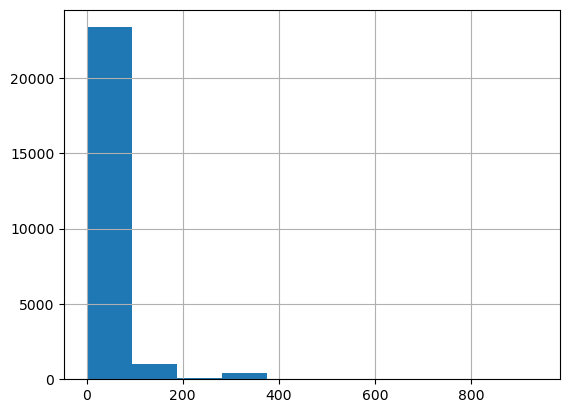

In [25]:
df_final_samsung['avg_release_freq'].hist()

In [26]:
grouped = df_final_samsung.groupby(['device'])

df_filtered = grouped.filter(lambda x: x['avg_release_freq'].mean()>200)

df_filtered['device'].unique()

array(['galaxy s6', 'galaxy s6 edge', 'galaxy tab a plus 9.7',
       'galaxy tab e 8.0"', 'galaxy on7 (2015)'], dtype=object)

 ### Release Delay

In [27]:
df_final_samsung['avg_release_delay'].mean()

125.84109353225674

In [28]:
df_final_samsung['avg_release_delay'].max()

2632.0

In [29]:
len(df_final_samsung[~df_final_samsung['avg_release_delay'].isnull()])

24398

In [30]:
len(df_final_samsung[~df_final_samsung['avg_release_delay'].isnull()]['device'].unique())

495

In [31]:
grouped = df_final_samsung.groupby(['device'])
  
df_filtered = grouped.filter(lambda x: (x['avg_release_delay'].mean()<70))

len(df_filtered['device'].unique())

409

In [32]:
grouped = df_final_samsung.groupby(['device'])
  
df_filtered = grouped.filter(lambda x: (x['avg_release_delay'].mean()>70))

len(df_filtered['device'].unique())

86

In [33]:
df_filtered.groupby(['device'])['avg_release_delay'].mean().max()

2131.703703703704

In [34]:
df_filtered.groupby(['device'])['avg_release_delay'].mean().min()

71.21739130434783

### Release delay by SPLs 

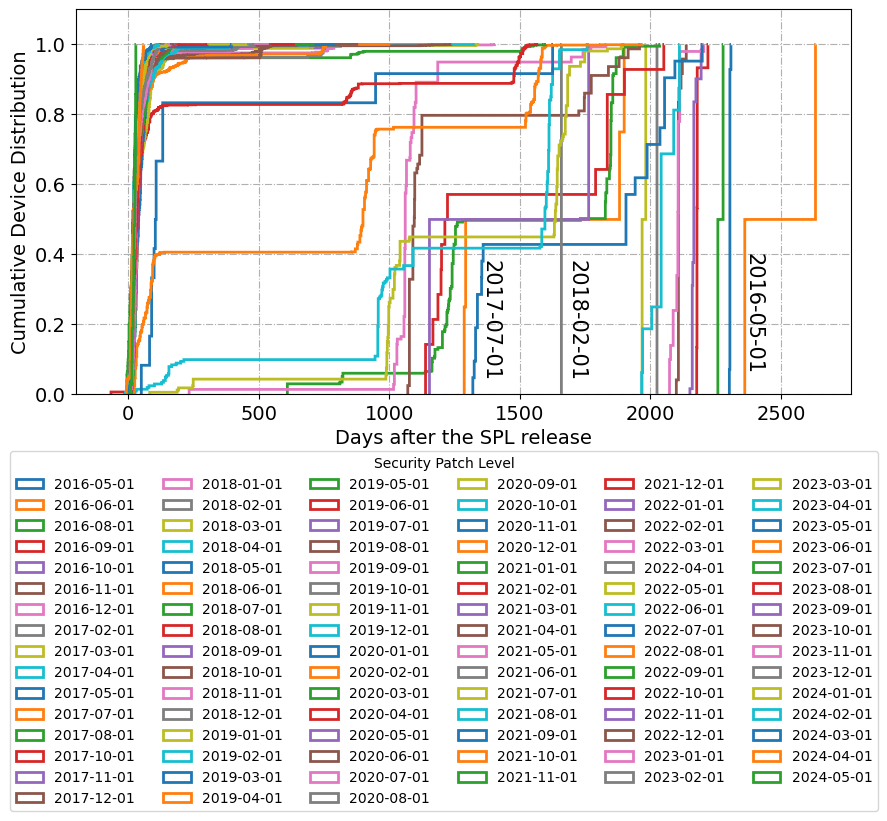

<Figure size 640x480 with 0 Axes>

In [35]:
import datetime 
import matplotlib.pyplot as plt


if pd.api.types.is_datetime64_any_dtype(df_samsung['security_patch_level']):
    df_samsung['SPL_delay'] = (df_samsung['release_date'] - df_samsung['security_patch_level']).dt.days
    df_samsung['security_patch_level'] = df_samsung['security_patch_level'].dt.date

cond1 = df_samsung['security_patch_level']>datetime.date(2016, 4, 1)
cond2 = df_samsung['security_patch_level']<datetime.date(2024, 6, 1) 

spl_list =  sorted(df_samsung[cond1&cond2]['security_patch_level'].unique())

fig, ax = plt.subplots(figsize=(10, 5))

for spl in spl_list[:]:
    column = df_samsung[df_samsung['security_patch_level']==spl]['SPL_delay']
    
    if len(column)<0:
        print('{}: '.format(spl,len(column)))
        continue
    
    n, bins, patches = ax.hist(column,bins=1000, density=True, histtype='step',cumulative=True,linewidth=2,label=spl)
    patches[0].set_xy(patches[0].get_xy()[:-1])
    
    if (0.4<n[500]<0.45) & (bins[1]<500):
        plt.text(300,n[500]+0.02,spl,fontsize=16)
        
    if (0.821<n[500]<0.822) & (bins[1]<500):
        plt.text(300,n[500]-0.06,spl,fontsize=15)
        
    if (0.14<n[500]<0.15) & (bins[1]<500):
        plt.text(300,n[500]-0.03,spl,fontsize=15)
        
    if spl==datetime.date(2018, 2, 1):
        plt.text(1680,0.05,spl,fontsize=15,rotation=270)
        
    if spl==datetime.date(2016, 5, 1):
        plt.text(2355,0.07,spl,fontsize=15,rotation=270)
        
    if spl==datetime.date(2017, 7, 1):
        plt.text(1350,0.05,spl,fontsize=15,rotation=270)
        
plt.ylabel('Cumulative Device Distribution',fontsize=14)
plt.xlabel('Days after the SPL release',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(linestyle='-.')
plt.legend(ncol=6,loc='lower center', bbox_to_anchor=(0.475, -1.1),title='Security Patch Level')
plt.ylim(0, 1.1)
plt.savefig('../2024_Data/Figures/SPL_delays_all.png', bbox_inches='tight')
plt.show()
plt.tight_layout()

# 2. Xiaomi 

In [36]:
import pandas as pd


xiaomi_combined = pd.read_csv('../2024_Data/xiaomi/xiaomi_security_updates_combined.csv')
xiaomi_combined['date'] = pd.to_datetime(xiaomi_combined['date'], format='%m/%d/%y', errors='coerce')
xiaomi_combined['SPL_date'] = pd.to_datetime(xiaomi_combined['SPL_date'], format='%m/%d/%y', errors='coerce')

xiaomi_combined.head()

,android,branch,codename,date,link,md5,method,name,size,version,device,region,codename_short,changelog_url,changelog,SPL,SPL_date,delay,delay_days,device_type
0,14.0,Stable Beta,air_global,2024-06-21,https://bigota.d.miui.com/OS1.0.2.0.UGQMIXM/mi...,3a209a95cf459cb3627064a04d838719,Recovery,Redmi 13R 5G / 13C 5G Global,4.4 GB,OS1.0.2.0.UGQMIXM,Redmi 13R 5G / 13C 5G,Global,air,https://xiaomifirmwareupdater.com/miui/air/sta...,NaN,NaN,NaT,NaN,NaN,Phone
1,13.0,Stable Beta,pissarro_in_fk_global,2024-06-21,https://bigota.d.miui.com/OS1.0.4.0.TKTINFK/mi...,4db2a59340c910897a8364aa3cae8684,Recovery,Xiaomi 11i 5G India,3.7 GB,OS1.0.4.0.TKTINFK,Xiaomi 11i 5G,India,pissarro,https://xiaomifirmwareupdater.com/miui/pissarr...,NaN,NaN,NaT,NaN,NaN,Phone
2,14.0,Stable,ruan_in_global,2024-06-21,https://bigota.d.miui.com/OS1.0.1.0.UFSINXM/mi...,42dad36ffb4679828590feedf802bed4,Recovery,Redmi Pad Pro 5G / POCO Pad 5G India,4.2 GB,OS1.0.1.0.UFSINXM,Redmi Pad Pro 5G / POCO Pad 5G,India,ruan,https://xiaomifirmwareupdater.com/miui/ruan/st...,NaN,NaN,NaT,NaN,NaN,Tablet
3,14.0,Stable Beta,vermeer_ru_global,2024-06-21,https://bigota.d.miui.com/OS1.0.3.0.UNKRUXM/mi...,4ba449360797c3cfb500a7163e562982,Recovery,POCO F6 Pro Russia,6.3 GB,OS1.0.3.0.UNKRUXM,POCO F6 Pro,Russia,vermeer,https://xiaomifirmwareupdater.com/miui/vermeer...,NaN,NaN,NaT,NaN,NaN,Phone
4,14.0,Stable Beta,moon_eea_global,2024-06-20,https://bigota.d.miui.com/OS1.0.3.0.UNTEUXM/mi...,b44caa78930161287e5c0c49a1d054fb,Recovery,Redmi 13 / POCO M6 EEA,4.5 GB,OS1.0.3.0.UNTEUXM,Redmi 13 / POCO M6,EEA,moon,https://xiaomifirmwareupdater.com/miui/moon/st...,NaN,NaN,NaT,NaN,NaN,Phone


In [37]:
xiaomi_combined = xiaomi_combined.sort_values(by='date')
xiaomi_combined = xiaomi_combined[xiaomi_combined['date'] < '2024-06-01']

print(xiaomi_combined['date'].iloc[0])
print(xiaomi_combined['date'].iloc[-1])

2014-12-05 00:00:00
2024-05-31 00:00:00


## 2.1 Feature extraction

In [38]:

d = []
counter = 0

for codename in xiaomi_combined['codename'].unique():
    #print('codename: {}'.format(codename))
    
    df_test = xiaomi_combined[xiaomi_combined['codename']==codename]
    
    device = df_test['device'].to_list()
    region = df_test['region'].to_list()
    
    device_type = df_test['device_type'].to_list()
    
    update_count = len(df_test)
    first_update_date = df_test['date'].min()
    last_update_date = df_test['date'].max()
    support_duration = (last_update_date-first_update_date).days
    update_frequency = support_duration / update_count if update_count else None
    
    last_android_version = df_test.loc[df_test['date']==last_update_date,'android'].to_list()
    
    delay = df_test['delay_days'].median()
    
    first_SPL = df_test['SPL_date'].min()
    last_SPL = df_test['SPL_date'].max()
        
    d.append({'codename': codename,
              'name': device[0],
              'device_type': device_type[0],
              'region': region[0],
              'last_android_version': last_android_version[0],
              'update_count': update_count,
              'first_update_date': first_update_date,
              'last_update_date': last_update_date,
              'first_SPL': first_SPL,
              'last_SPL': last_SPL,
              'support_duration': support_duration,
              'update_frequency': update_frequency,
              'delay': delay})
    
    counter = counter + 1
    
    print('Completed {} / {}'.format(counter,len(xiaomi_combined['codename'].unique())), end='\r')
    

df_final_xiaomi = pd.DataFrame(d)
    
df_final_xiaomi.head()

,codename,name,device_type,region,last_android_version,update_count,first_update_date,last_update_date,first_SPL,last_SPL,support_duration,update_frequency,delay
0,taurus,Mi 2A,Phone,China,4.1,8,2014-12-05,2015-04-27,NaT,NaT,143,17.875000,NaN
1,mione_plus,MI 1S,Phone,China,4.1,8,2014-12-05,2015-04-12,NaT,NaT,128,16.000000,NaN
2,HM2013022,Redmi 1 TD,Phone,China,4.4,8,2015-03-26,2017-11-15,NaT,NaT,965,120.625000,NaN
3,HM2014813,Redmi 2 LTE,Phone,China,4.4,2,2015-03-29,2015-03-29,NaT,NaT,0,0.000000,NaN
4,HM2013023_sg_global,Redmi 1 W,Phone,Singapore,4.4,12,2015-06-26,2015-12-24,NaT,NaT,181,15.083333,NaN


- Saving for the unpatched data 

In [39]:
df_final_xiaomi_new = df_final_xiaomi.rename(columns={
    'codename': 'id', 'name': 'device', 'last_version': 'last_android_version', 
    'last_release_date': 'last_update_date'
}, inplace=False)

df_final_xiaomi_new['last_android_version'] = df_final_xiaomi_new['last_android_version'].apply(lambda version: 'Android ' + str(version))

def process_versions(version):
    if isinstance(version, str):
        parts = version.split()
        if len(parts) == 2 and len(parts[1].split('.')) == 1:
            return parts[0] + ' ' + parts[1] + '.0'
        else:
            return version
    else:
        return version

# Apply the function to the column
df_final_xiaomi_new['last_android_version'] = df_final_xiaomi_new['last_android_version'].apply(process_versions)

df_final_xiaomi_new[['id', 'device', 'region',
                     'last_android_version',
                     'last_update_date']].to_csv('../2024_Data/xiaomi/xiaomi_unpatched_devices.csv', index=False)


In [40]:
len(df_final_xiaomi['name'].unique())

326

In [41]:
len(df_final_xiaomi_new['device'].unique())

326

In [42]:
#Queried
print('===================')
print('Total Updates: {}'.format(len(xiaomi_combined.index)))
print('All Devices: {}'.format(len(xiaomi_combined['device'].unique())))
print('Unique Devices (combined using regional names): {}'.format(len(xiaomi_combined['codename_short'].unique())))
print('Unique Pairs: {}'.format(len(xiaomi_combined['codename'].unique())))
print('Unique Regions: {}'.format(len(xiaomi_combined['region'].unique())))
print('Last Update Date: {}'.format(xiaomi_combined['date'].max()))
print('First Update Date: {}'.format(xiaomi_combined['date'].min()))
print('Unique SPLs: {}'.format(len(xiaomi_combined['SPL'].unique())))
print('Last SPL: {}'.format(xiaomi_combined['SPL_date'].max()))
print('First SPL: {}'.format(xiaomi_combined['SPL_date'].min()))

Total Updates: 4800
All Devices: 327
Unique Devices (combined using regional names): 251
Unique Pairs: 902
Unique Regions: 11
Last Update Date: 2024-05-31 00:00:00
First Update Date: 2014-12-05 00:00:00
Unique SPLs: 46
Last SPL: 2023-06-01 00:00:00
First SPL: 2018-12-01 00:00:00


In [43]:
xiaomi_combined['region'].unique()

array(['China', 'Singapore', 'Global', 'Taiwan', 'Russia', 'India',
       'Turkey', 'EEA', 'Indonesia', 'Japan', 'Korea'], dtype=object)

## 2.2 Initial Data Analysis

In [44]:
df_final_xiaomi[['update_count','support_duration','update_frequency','delay']].mean()

update_count          5.321508
support_duration    298.103104
update_frequency     52.765066
delay                32.700675
dtype: float64

 ### Update Count

In [45]:
df_final_xiaomi[df_final_xiaomi['update_count']>=6]['region'].value_counts()

region
China        155
Global        93
EEA           28
India         27
Turkey        27
Russia        22
Indonesia     18
Taiwan         7
Singapore      1
Name: count, dtype: int64

In [46]:
sum_counts = df_final_xiaomi[df_final_xiaomi['update_count'] >= 6]['region'].value_counts().sum()
print(sum_counts)


378


 ### Support Duration

In [47]:
df_final_xiaomi.columns

Index(['codename', 'name', 'device_type', 'region', 'last_android_version',
       'update_count', 'first_update_date', 'last_update_date', 'first_SPL',
       'last_SPL', 'support_duration', 'update_frequency', 'delay'],
      dtype='object')

In [48]:
numeric_cols = ['update_count', 'support_duration', 'update_frequency', 'delay']
df_final_xiaomi[numeric_cols] = df_final_xiaomi[numeric_cols].apply(pd.to_numeric, errors='coerce')

result = df_final_xiaomi.groupby('region')[numeric_cols].mean()
print(result)

           update_count  support_duration  update_frequency      delay
region                                                                
China          8.211640        355.597884         41.958111  28.155556
EEA            4.303571        327.937500         64.918346  35.288235
Global         5.620690        303.408046         51.639884  39.070000
India          4.411765        285.588235         55.797941  30.117188
Indonesia      4.138889        241.222222         50.554167  35.028846
Japan          3.428571        222.000000         55.714286  11.800000
Korea          3.000000         75.000000         25.000000        NaN
Russia         4.078261        216.556522         45.828178  33.221591
Singapore     12.000000        181.000000         15.083333        NaN
Taiwan         3.805556        276.680556         64.652431  29.933962
Turkey         4.500000        322.716216         63.105245  29.160714


 ### Update Frequency

In [49]:
df_final_xiaomi['update_frequency'].mean()

52.765066065370945

 ### Release Delay

In [50]:
xiaomi_combined.groupby('SPL_date')['delay_days'].median().sort_index()

SPL_date
2018-12-01    163.0
2019-07-01    134.0
2019-08-01     28.0
2019-09-01      3.0
2019-10-01     36.0
2019-12-01     24.0
2020-01-01    169.0
2020-03-01     20.0
2020-04-01     78.0
2020-06-01     31.5
2020-07-01     31.5
2020-08-01     45.0
2020-09-01     43.0
2020-10-01     54.5
2020-11-01     54.5
2020-12-01     55.0
2021-01-01     13.0
2021-02-01     38.0
2021-03-01     25.5
2021-05-01     35.5
2021-06-01     40.0
2021-07-01     46.0
2021-08-01     35.5
2021-09-01     55.0
2021-10-01     56.0
2021-11-01     66.5
2021-12-01     34.0
2022-01-01    402.0
2022-02-01     24.0
2022-03-01     27.0
2022-04-01     61.0
2022-05-01     59.5
2022-06-01     48.0
2022-07-01     46.0
2022-08-01     33.0
2022-09-01     27.0
2022-10-01     32.5
2022-11-01     30.0
2022-12-01     44.5
2023-01-01     44.0
2023-02-01     34.0
2023-03-01     27.0
2023-04-01     25.0
2023-05-01     18.0
2023-06-01      1.5
Name: delay_days, dtype: float64

In [51]:
xiaomi_combined.groupby(xiaomi_combined['SPL_date'].dt.year)['delay_days'].median().sort_index()

SPL_date
2018.0    163.0
2019.0     24.0
2020.0     46.0
2021.0     39.0
2022.0     38.0
2023.0     25.0
Name: delay_days, dtype: float64

# 3. Oppo

In [52]:
import os
import pycountry
import pandas as pd


oppo_security_updates = pd.read_csv('../2024_Data/oppo/oppo_security_updates.csv')
oppo_regions = pd.read_csv('../2024_Data/oppo/oppo_regions.csv')

for i in oppo_security_updates.index:
    region_url = oppo_security_updates.loc[i,'region_url']
    country = oppo_regions.loc[oppo_regions['url'] == region_url,'Country'].tolist()
    if country:
        oppo_security_updates.at[i,'country'] = country[0]
    else:
        oppo_security_updates.at[i,'country'] = ''
        
    region = oppo_regions.loc[oppo_regions['url'] == region_url,'Region'].tolist()
    if region:
        oppo_security_updates.at[i,'region'] = region[0]
    else:
        oppo_security_updates.at[i,'region'] = ''

    lang = oppo_regions.loc[oppo_regions['url'] == region_url,'lang'].tolist()
    if lang:
        oppo_security_updates.at[i,'lang'] = lang[0]
    else:
        oppo_security_updates.at[i,'lang'] = ''
    
oppo_security_updates['filename'] = oppo_security_updates['download_link'].apply(lambda x: os.path.basename(x))  
oppo_security_updates.head()

,device,device_model,version,colorOS,size,date,downloads,download_link,region_url,search_url,android_version,country,region,lang,filename
0,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.45,11,3.41 GB,2021/10/09,"1,213",https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,NaN,Russia,Europe,ru,CPH1871PUEX_11_OTA_3450_all_Ug5xmZBZByXM.ozip
1,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.43,11,NaN,2021/08/30,965,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,NaN,Russia,Europe,ru,CPH1871PUEX_11_OTA_3430_all_O9KHbmE0wgle.ozip
2,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.41,11,NaN,2021/08/09,941,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,NaN,Russia,Europe,ru,CPH1871PUEX_11_OTA_3410_all_wkxT0NTWSWzJ.ozip
3,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.37,11,NaN,2021/06/09,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,NaN,Russia,Europe,ru,CPH1871PUEX_11_OTA_3370_all_3n6wi8nSl3RQ.ozip
4,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.35,11,NaN,2021/05/20,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,NaN,Russia,Europe,ru,CPH1871PUEX_11_OTA_3350_all_VHuLssZwfExu.ozip


In [53]:
df_spl = pd.read_csv('../2024_Data/oppo/firmware_SPLs.csv')
df_spl.drop(columns={'android_version'}, inplace=True)
df_spl = df_spl.drop_duplicates(subset='filename', keep='first')

df_spl.head()

,filename,first_12_bytes,spl,identifier,firmware_name,os_version,patch_type
0,CPH1609EX_11_OTA_0330_all_202108090923.ozip,OPPOENCRYPT!,NaN,2.0,NaN,NaN,NaN
1,CPH1979EX_11_OTA_1260_all_djMChpDK8cK5.ozip,PK,NaN,3.0,NaN,NaN,NaN
2,CPH1907EUEX_11_OTA_0420_all_bDj6EUd5kD2y.ozip,OPPOENCRYPT!,2020-06-05,4.0,NaN,NaN,NaN
3,CPH2023EU_11_OTA_0800_all_7bEWPPACXHRm.ozip,OPPOENCRYPT!,2020-07-05,5.0,NaN,NaN,NaN
4,CPH2023EU_11_OTA_0960_all_paW2K1vjCOOi.ozip,OPPOENCRYPT!,2020-10-05,6.0,NaN,NaN,NaN


In [54]:
# Merge the dataframes
oppo_security_updates = pd.merge(oppo_security_updates, df_spl, on='filename', how='left')
oppo_security_updates.head()

,device,device_model,version,colorOS,size,date,downloads,download_link,region_url,search_url,...,country,region,lang,filename,first_12_bytes,spl,identifier,firmware_name,os_version,patch_type
0,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.45,11,3.41 GB,2021/10/09,"1,213",https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,Russia,Europe,ru,CPH1871PUEX_11_OTA_3450_all_Ug5xmZBZByXM.ozip,OPPOENCRYPT!,2021-09-05,454.0,NaN,NaN,NaN
1,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.43,11,NaN,2021/08/30,965,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,Russia,Europe,ru,CPH1871PUEX_11_OTA_3430_all_O9KHbmE0wgle.ozip,OPPOENCRYPT!,2021-08-05,453.0,NaN,NaN,NaN
2,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.41,11,NaN,2021/08/09,941,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,Russia,Europe,ru,CPH1871PUEX_11_OTA_3410_all_wkxT0NTWSWzJ.ozip,OPPOENCRYPT!,2021-07-05,452.0,NaN,NaN,NaN
3,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.37,11,NaN,2021/06/09,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,Russia,Europe,ru,CPH1871PUEX_11_OTA_3370_all_3n6wi8nSl3RQ.ozip,OPPOENCRYPT!,2021-06-05,451.0,NaN,NaN,NaN
4,OPPO Find X,CPH1871PUEX,CPH1871PUEX_11_F.35,11,NaN,2021/05/20,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,Russia,Europe,ru,CPH1871PUEX_11_OTA_3350_all_VHuLssZwfExu.ozip,OPPOENCRYPT!,2021-04-05,450.0,NaN,NaN,NaN


In [55]:
#Calculate delay    
oppo_security_updates['date']= pd.to_datetime(oppo_security_updates['date'], format='mixed', errors='coerce')
oppo_security_updates['spl'] = pd.to_datetime(oppo_security_updates['spl'], errors='coerce')
oppo_security_updates['delay'] = (oppo_security_updates['date'] - oppo_security_updates['spl']).dt.days

# oppo_security_updates['SPL'] = oppo_security_updates['SPL'].fillna('NotFound')
oppo_security_updates['ISO'] = oppo_security_updates['country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) is not None else None)
oppo_security_updates['device_model'] = oppo_security_updates['device_model'].replace(dict.fromkeys(['EX','PUEX','PU','EU','TW'], ''), regex=True)

oppo_security_updates.to_csv('../2024_Data/oppo/oppo_security_updates_with_spls.csv', index=False)
oppo_security_updates.head()

,device,device_model,version,colorOS,size,date,downloads,download_link,region_url,search_url,...,lang,filename,first_12_bytes,spl,identifier,firmware_name,os_version,patch_type,delay,ISO
0,OPPO Find X,CPH1871,CPH1871PUEX_11_F.45,11,3.41 GB,2021-10-09,"1,213",https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,ru,CPH1871PUEX_11_OTA_3450_all_Ug5xmZBZByXM.ozip,OPPOENCRYPT!,2021-09-05,454.0,NaN,NaN,NaN,34.0,None
1,OPPO Find X,CPH1871,CPH1871PUEX_11_F.43,11,NaN,2021-08-30,965,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,ru,CPH1871PUEX_11_OTA_3430_all_O9KHbmE0wgle.ozip,OPPOENCRYPT!,2021-08-05,453.0,NaN,NaN,NaN,25.0,None
2,OPPO Find X,CPH1871,CPH1871PUEX_11_F.41,11,NaN,2021-08-09,941,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,ru,CPH1871PUEX_11_OTA_3410_all_wkxT0NTWSWzJ.ozip,OPPOENCRYPT!,2021-07-05,452.0,NaN,NaN,NaN,35.0,None
3,OPPO Find X,CPH1871,CPH1871PUEX_11_F.37,11,NaN,2021-06-09,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,ru,CPH1871PUEX_11_OTA_3370_all_3n6wi8nSl3RQ.ozip,OPPOENCRYPT!,2021-06-05,451.0,NaN,NaN,NaN,4.0,None
4,OPPO Find X,CPH1871,CPH1871PUEX_11_F.35,11,NaN,2021-05-20,916,https://assorted.downloads.oppo.com/firmware/C...,https://support.oppo.com/ru/software-update/,https://support.oppo.com/ru/software-update/so...,...,ru,CPH1871PUEX_11_OTA_3350_all_VHuLssZwfExu.ozip,OPPOENCRYPT!,2021-04-05,450.0,NaN,NaN,NaN,45.0,None


In [56]:
print(oppo_security_updates['android_version'].notna().sum())
print(oppo_security_updates['spl'].notna().sum())

490
7266


## 3.1 Feature extraction

In [57]:
d = []
counter = 0

for url in oppo_security_updates['search_url'].unique():
    df_test = oppo_security_updates[oppo_security_updates['search_url']==url]
    
    device = df_test['device'].to_list()
    country = df_test['country'].to_list()
    region = df_test['region'].to_list()
    
    update_count = len(df_test)
    
    first_update_date = df_test['date'].min()
    last_update_date = df_test['date'].max()
    support_duration = (last_update_date-first_update_date).days
    update_frequency = support_duration / update_count
    avg_delay = df_test['delay'].median()
    android_version = df_test.loc[df_test['date']==last_update_date,'android_version'].to_list()
    
    d.append({'device': device[0],
              'country': country[0],
              'region': region[0],
              'last_android_version': android_version[0],
              'update_count': update_count,
              'first_update_date': first_update_date,
              'last_update_date': last_update_date,
              'support_duration': support_duration,
              'update_frequency': update_frequency,
              'delay': avg_delay,
              'url': url,})
    
    counter = counter + 1 
    print('Completed {} / {}'.format(counter,len(oppo_security_updates['search_url'].unique())), end='\r')
    
df_final_oppo = pd.DataFrame(d)

# Assuming your DataFrame is named df_final and the column with the country names is 'country'
df_final_oppo['ISO'] = df_final_oppo['country'].apply(lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) is not None else None)

df_final_oppo.head()
    

,device,country,region,last_android_version,update_count,first_update_date,last_update_date,support_duration,update_frequency,delay,url,ISO
0,OPPO Find X,Russia,Europe,NaN,48,2019-01-03,2021-10-09,1010,21.041667,29.5,https://support.oppo.com/ru/software-update/so...,None
1,OPPO Find X2,Russia,Europe,NaN,16,2020-03-21,2020-11-07,231,14.437500,35.0,https://support.oppo.com/ru/software-update/so...,None
2,OPPO Reno3,Russia,Europe,NaN,18,2020-03-09,2021-01-05,302,16.777778,NaN,https://support.oppo.com/ru/software-update/so...,None
3,OPPO Reno,Russia,Europe,NaN,30,2019-04-29,2021-07-01,794,26.466667,36.0,https://support.oppo.com/ru/software-update/so...,None
4,OPPO Reno2,Russia,Europe,NaN,24,2019-10-21,2021-05-25,582,24.250000,37.0,https://support.oppo.com/ru/software-update/so...,None


- Saved for unpatched analysis

In [58]:
df_final_oppo_new= df_final_oppo.rename(columns={'url': 'id'},inplace=False)

def process_versions(version):
    if isinstance(version, str):
        parts = version.split()
        if len(parts) == 2 and len(parts[1].split('.')) == 1:
            return parts[0] + ' ' + parts[1] + '.0'
        else:
            return version
    else:
        return version

# Apply the function to the column
df_final_oppo_new['last_android_version'] = df_final_oppo_new['last_android_version'].apply(process_versions)

df_final_oppo_new[['id','device', 'country', 'region',
                   'last_android_version', 
                   'last_update_date']].to_csv('../2024_Data/oppo/oppo_unpatched_devices.csv',index=False)

In [59]:
len(df_final_oppo['device'].unique())

77

In [60]:
len(df_final_oppo_new['device'].unique())

77

In [61]:
#Queried
print('===================')
print('Total Updates: {}'.format(len(oppo_security_updates.index)))
print('All Devices: {}'.format(len(oppo_security_updates['device'].unique())))
print('Unique Pairs: {}'.format(len(oppo_security_updates['search_url'].unique())))
print('Unique Countries: {}'.format(len(oppo_security_updates['country'].unique())))
print('Last Update Date: {}'.format(oppo_security_updates['date'].max()))
print('First Update Date: {}'.format(oppo_security_updates['date'].min()))
print('Unique SPLs: {}'.format(len(oppo_security_updates['spl'].unique())))
print('Last SPL: {}'.format(oppo_security_updates['spl'].max()))
print('First SPL: {}'.format(oppo_security_updates['spl'].min()))

Total Updates: 18836
All Devices: 77
Unique Pairs: 1183
Unique Countries: 35
Last Update Date: 2022-08-25 00:00:00
First Update Date: 2018-01-29 00:00:00
Unique SPLs: 36
Last SPL: 2021-09-05 00:00:00
First SPL: 2018-10-05 00:00:00


## 3.2 Initial Data Analysis

In [62]:
df_final_oppo[['update_count','support_duration','update_frequency','delay']].mean()

update_count         15.922232
support_duration    584.049028
update_frequency     46.813436
delay                35.440594
dtype: float64

 ### Update Count

In [63]:
df_final_oppo.groupby('device')['update_count'].mean().sort_values(ascending=False)[:10]

device
OPPO R17 Pro         47.300000
OPPO R17             43.200000
OPPO Find X          39.481481
OPPO K3              32.000000
OPPO K1              30.000000
OPPO RX17 Neo        28.222222
OPPO Reno            27.500000
OPPO A3s(CPH1803)    26.857143
OPPO A5              26.500000
OPPO R15 Pro         25.090909
Name: update_count, dtype: float64

In [64]:
df_final_oppo.groupby('device')['update_count'].mean().sort_values(ascending=True)[:10]

device
OPPO Reno4 F         2.000000
OPPO Reno4 5G        2.000000
OPPO Reno3 A         2.000000
OPPO R9s             2.000000
OPPO Reno4 Lite      2.000000
OPPO A73(CPH2095)    2.230769
Neo 7                4.000000
OPPO Reno4           4.000000
OPPO A57             4.000000
OPPO A54             4.000000
Name: update_count, dtype: float64

In [65]:
grouped = df_final_oppo.groupby(['device'])
  
df_filtered = grouped.filter(lambda x: (x['update_count'].mean()<2.01))

len(df_filtered['device'].unique())

5

In [66]:
df_filtered[df_filtered['device']=='OPPO Reno4']['url'].to_list()

[]

In [67]:
df_filtered['last_update_date'] = pd.to_datetime(df_filtered['last_update_date'], errors='coerce')

df_filtered['last_update_date'].value_counts()

last_update_date
2019-06-27    3
2020-10-09    2
2021-01-18    2
2020-12-24    1
2020-12-14    1
Name: count, dtype: int64

 ### Support Duration

In [68]:
df_final_oppo['support_duration'].mean()

584.0490278951818

In [69]:
df_final_oppo.groupby('device')['support_duration'].mean().sort_values(ascending=False)[:10]

device
OPPO F7          1113.944444
OPPO F7 128G     1082.055556
OPPO R15          964.000000
OPPO R17          964.000000
OPPO F9           925.555556
OPPO R17 Pro      894.600000
OPPO R15 Pro      888.909091
OPPO Find X       888.111111
OPPO F7 Youth     882.062500
OPPO F5           873.952381
Name: support_duration, dtype: float64

In [70]:
df_final_oppo.groupby('device')['support_duration'].mean().sort_values(ascending=True)[:10]

device
OPPO A54              21.000000
OPPO Reno4 F          38.000000
OPPO Reno4 Lite       38.000000
OPPO Reno4 5G         48.333333
OPPO F17              63.000000
OPPO A93              88.545455
OPPO F17 Pro          92.000000
OPPO A73 5G           93.000000
OPPO Reno4           104.428571
OPPO A73(CPH2095)    108.692308
Name: support_duration, dtype: float64

 ### Update Frequency

In [71]:
df_final_oppo['update_frequency'].mean()

46.81343606894017

In [72]:
df_final_oppo.groupby('device')['update_frequency'].mean().sort_values(ascending=False)[:10]

device
OPPO R9s        237.000000
OPPO F1 Plus    134.782051
OPPO F1         131.380208
OPPO A73        127.972222
OPPO A15s       112.016204
OPPO A11k        98.094737
OPPO A57         97.050000
OPPO A77         90.850000
Neo 7            89.500000
OPPO F3          86.497917
Name: update_frequency, dtype: float64

In [73]:
df_final_oppo.groupby('device')['update_frequency'].mean().sort_values(ascending=True)[:30]

device
OPPO A54            5.250000
OPPO F17 Pro       14.055556
OPPO A93           15.166667
OPPO F17           15.346154
OPPO A73 5G        17.583333
OPPO Reno3         18.221771
OPPO Reno4 F       19.000000
OPPO Reno4 Lite    19.000000
OPPO R17 Pro       19.328815
OPPO F15           20.009675
OPPO A91           20.654626
OPPO F9 Pro        20.750000
OPPO A33           20.833333
OPPO K3            21.239583
OPPO R17           22.326840
OPPO A9            22.375000
OPPO Find X        22.959613
OPPO Reno4 5G      24.166667
OPPO Find X2       24.210137
OPPO RX17 Neo      24.258576
OPPO A53           24.692778
OPPO A52           25.372464
OPPO Reno Z        25.570110
OPPO Reno4         26.107143
OPPO A5            26.118750
OPPO Reno          26.978265
OPPO A92           27.061404
OPPO A7            27.838034
OPPO K1            27.966667
OPPO Reno2         30.200603
Name: update_frequency, dtype: float64

In [74]:
grouped = df_final_oppo.groupby(['device'])
  
df_filtered = grouped.filter(lambda x: (x['update_frequency'].mean()<30))

len(df_filtered['device'].unique())

29

In [75]:
oppo_security_updates[oppo_security_updates['search_url']=='https://support.oppo.com/id/software-update/OPPO A54']

,device,device_model,version,colorOS,size,date,downloads,download_link,region_url,search_url,...,lang,filename,first_12_bytes,spl,identifier,firmware_name,os_version,patch_type,delay,ISO


 ### Release Delay

In [76]:
df_final_oppo['delay'].mean()

35.44059405940594

<Axes: >

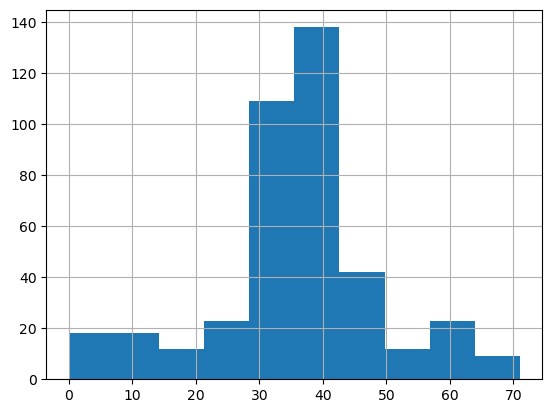

In [77]:
df_final_oppo['delay'].hist()

In [78]:
df_final_oppo.groupby('device')['delay'].mean().sort_values(ascending=False)[:10]

device
OPPO F9           54.416667
OPPO F9 Pro       52.500000
OPPO Find X2      47.272727
OPPO A91          46.675000
OPPO R15 Pro      42.318182
OPPO Reno         42.229167
OPPO RX17 Pro     39.571429
OPPO Reno4 Pro    39.500000
OPPO Reno2        39.080645
OPPO F11          38.325000
Name: delay, dtype: float64

In [79]:
df_final_oppo.groupby('device')['delay'].mean().sort_values(ascending=True)[:10]

device
OPPO Reno4 F        0.000000
OPPO Reno4 Lite     0.000000
OPPO F17 Pro        4.333333
OPPO A93            5.045455
OPPO Reno4         14.000000
OPPO Reno Z        15.846154
OPPO K1            17.000000
OPPO RX17 Neo      25.285714
OPPO A9            28.500000
OPPO Find X        28.888889
Name: delay, dtype: float64

In [80]:
df_final_oppo[df_final_oppo['device']=='OPPO Reno4 F']['url'].to_list()

['https://support.oppo.com/kz/software-update/software-download/?m=Reno4%20F']

In [81]:
df_final_oppo[df_final_oppo['device']=='OPPO Reno4 Lite']['url'].to_list()

['https://support.oppo.com/id/software-update/software-download/?m=Reno4%20Lite']

# 4. Google 

In [82]:
import pandas as pd


#https://developers.google.com/android/ota
df_ota  = pd.read_excel('../2024_Data/pixel/ota_images.xlsx')

#https://source.android.com/docs/setup/about/build-numbers
df_tags  = pd.read_excel('../2024_Data/pixel/source_code_tags.xlsx')

#extract information from 'Version' column
pattern = r'^(?P<Version2>\d+\.\d+\.\d+)\s+\((?P<Details>[^)]+)\)$'

#separate inside and outside of paranthesis (inside=details,outside=version2)
df_ota[['Version2','Details']] = df_ota['Version'].str.extract(pattern)

#separate inside of paranthesis into further parts (build, date, carriers)
df_ota[['Build', 'Date', 'Carriers']] = df_ota['Details'].str.split(',', n=2, expand=True)

# df_ota.to_excel('../2024_Data/pixel/ota_images_v2.xlsx',index=False)


## 4.1 (Manually fixed some build numbers before run in v3) Add the SPL and other build variables

In [83]:
import pandas as pd

df_ota = pd.read_excel('../2024_Data/pixel/ota_images_v2.xlsx')

for i in df_ota.index:
    
    build = df_ota.loc[i,'Build']    
    tag = df_tags.loc[df_tags['Build ID'] == build,'Tag'].tolist()
    try: 
        df_ota.at[i,'build_tag'] = tag[0]
    except IndexError:
        df_ota.at[i,'build_tag'] = ''
        
    version = df_tags.loc[df_tags['Build ID'] == build,'Version'].tolist()
    try: 
        df_ota.at[i,'build_version'] = version[0]
    except IndexError:
        df_ota.at[i,'build_version'] = ''
        
    supported_devices = df_tags.loc[df_tags['Build ID'] == build,'Supported devices'].tolist()
    try: 
        df_ota.at[i,'build_supported_devices'] = supported_devices[0]
    except IndexError:
        df_ota.at[i,'build_supported_devices'] = ''
        
    build_spl = df_tags.loc[df_tags['Build ID'] == build,'Security patch level'].tolist()
    try: 
        df_ota.at[i,'build_spl'] = build_spl[0]
    except IndexError:
        df_ota.at[i,'build_spl'] = ''
            
df_ota['Date'] = pd.to_datetime(df_ota['Date'], errors='coerce')
df_ota[['codename', 'model']] = df_ota['Device'].str.extract(r'(.+) for (.+)', expand=True)
df_ota['build_spl'] = pd.to_datetime(df_ota['build_spl'], errors='coerce')
df_ota['delay'] = (df_ota['Date'] - df_ota['build_spl']).dt.days

#exclude Nexus devices
df_ota = df_ota[~df_ota['Device'].str.contains('Nexus')]

# Keep the timeframe to 2024 May by filterring out the data after '2024-06-01'
df_ota = df_ota[df_ota['Date'] < '2024-06-01']

df_ota.to_csv('../2024_Data/pixel/pixel_security_updates.csv', index=False)

df_ota.head()


/var/folders/64/c68452391mv_849dpqtr2rch0000gn/T/ipykernel_61105/1977962011.py:32: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_ota['Date'] = pd.to_datetime(df_ota['Date'], errors='coerce')


,Device,Version,Download_Link,Version2,Details,Build,Date,Carriers,build_tag,build_version,build_supported_devices,build_spl,codename,model,delay
0,"""akita"" for Pixel 8a","14.0.0 (UD2A.231203.054, May 2024, EMEA, APAC,...",https://dl.google.com/dl/android/aosp/akita-ot...,14.0.0,"UD2A.231203.054, May 2024, EMEA, APAC, JP",UD2A.231203.054,2024-05-01,"EMEA, APAC, JP",android-14.0.0_r38,Android14,Pixel 8a,2024-03-05,"""akita""",Pixel 8a,57.0
1,"""akita"" for Pixel 8a","14.0.0 (UD2A.231203.057, May 2024, AT&T, T-Mob...",https://dl.google.com/dl/android/aosp/akita-ot...,14.0.0,"UD2A.231203.057, May 2024, AT&T, T-Mobile",UD2A.231203.057,2024-05-01,"AT&T, T-Mobile",android-14.0.0_r39,Android14,Pixel 8a,2024-03-05,"""akita""",Pixel 8a,57.0
2,"""akita"" for Pixel 8a","14.0.0 (UD2A.231203.057.A1, May 2024, Verizon,...",https://dl.google.com/dl/android/aosp/akita-ot...,14.0.0,"UD2A.231203.057.A1, May 2024, Verizon, gStore,...",UD2A.231203.057.A1,2024-05-01,"Verizon, gStore, CA, USC",android-14.0.0_r40,Android14,Pixel 8a,2024-03-05,"""akita""",Pixel 8a,57.0
3,"""akita"" for Pixel 8a","14.0.0 (UD2A.240505.001, May 2024, EMEA, APAC,...",https://dl.google.com/dl/android/aosp/akita-ot...,14.0.0,"UD2A.240505.001, May 2024, EMEA, APAC, JP",UD2A.240505.001,2024-05-01,"EMEA, APAC, JP",android-14.0.0_r41,Android14,Pixel 8a,2024-05-05,"""akita""",Pixel 8a,-4.0
4,"""akita"" for Pixel 8a","14.0.0 (UD2A.240505.001.A1, May 2024, AT&T, T-...",https://dl.google.com/dl/android/aosp/akita-ot...,14.0.0,"UD2A.240505.001.A1, May 2024, AT&T, T-Mobile",UD2A.240505.001.A1,2024-05-01,"AT&T, T-Mobile",android-14.0.0_r42,Android14,Pixel 8a,2024-05-05,"""akita""",Pixel 8a,-4.0


In [84]:
print('Total records:', len(df_ota))
print('Rows with carrier:', len(df_ota[~df_ota['Carriers'].isnull()]))


Total records: 1015
Rows with carrier: 326


In [85]:
import re

unique_carriers = set()

for carriers in df_ota['Carriers']:
    if carriers and isinstance(carriers, str):  # Check if carriers is not NaN and is a string
        unique_carriers.update(re.split(r'[,/]', carriers))
    elif carriers:  # If carriers is a float, convert to string and then split
        unique_carriers.update(re.split(r'[,/]', str(carriers)))

updated_carriers = set()
for carrier in unique_carriers:
    if 'Rogers' in carrier:
        updated_carriers.update(carrier.split('/'))
    else:
        updated_carriers.add(carrier.strip())  # Strip any leading or trailing whitespace

print(updated_carriers)


{'EU carriers', 'Bell', 'KDDI', 'Vodafone AU', 'Fi Carriers', 'EMEA and SG carriers', 'NHG47N', 'Fi carriers', 'All carriers except EMEA and SG', 'All carriers except Verizon', 'Deutsche Telekom', 'CA', 'Telus', 'AU & JP carriers', 'Google Fi', 'Select JP & TW carriers', 'Sprint', 'Softbank', 'Telus and Koodo Only', 'Virgin', 'NTT DOCOMO', 'Canada', 'Telia', 'JP', 'UK only', 'TW carriers', ' and Rogers', 'All carriers except TW', 'gStore', 'US-Emerging', 'EMEA', 'EU', 'T-Mobile', 'O2', 'Verizon MVNOs', 'G-store', 'AU', 'Telstra', 'Telstra Only', 'All carriers except AT&T', 'JP carriers', 'T-Mobile carriers', 'USCC', 'T-Mobile (US)', 'IN', 'USC', 'Docomo', 'Fido', 'Verizon', 'TW', 'O2 UK', 'Telus Only', 'AT&T', 'Europe', 'CA carriers', 'T-Mobile MVNOs', 'Optus', 'All carriers except AT&T and Verizon', '& TW carriers', 'APAC carriers', ' Rogers Only', 'Fi', 'Japan', 'AU carriers', 'ATT', ' Rogers', 'DTAG', 'EMEA carriers', 'APAC', 'KDDI only', 'JP carriers and Verizon', 'Rakuten', 'nan',

In [86]:
#Queried
print('===================')
print('Total Updates: {}'.format(len(df_ota.index)))
print('All Devices: {}'.format(len(df_ota['Device'].unique())))
print('Last Update Date: {}'.format(df_ota['Date'].max()))
print('First Update Date: {}'.format(df_ota['Date'].min()))
print('Unique SPLs: {}'.format(len(df_ota['build_spl'].unique())))
print('Last SPL: {}'.format(df_ota['build_spl'].max()))
print('First SPL: {}'.format(df_ota['build_spl'].min()))

Total Updates: 1015
All Devices: 45
Last Update Date: 2024-05-01 00:00:00
First Update Date: 2016-10-01 00:00:00
Unique SPLs: 101
Last SPL: 2024-05-05 00:00:00
First SPL: 2016-10-05 00:00:00


## 4.1 Feature extraction

In [87]:
# df_ota = pd.read_csv('../2024_Data/pixel/pixel_security_updates.csv')

df_ota['Date'] = pd.to_datetime(df_ota['Date'], errors='coerce')
df_ota['build_spl'] = pd.to_datetime(df_ota['build_spl'], errors='coerce')

d = []
counter = 0

for codename in df_ota['codename'].unique():
    
    df_test = df_ota[df_ota['codename']==codename]
    df_test = df_test.sort_values(by='Date')
    
    device = df_test['model'].to_list()[0]
    
    update_count = len(df_test['build_spl'].unique())
    first_update_date = df_test['Date'].min()
    last_update_date = df_test['Date'].max()
    support_duration = (last_update_date-first_update_date).days
    update_frequency = support_duration/update_count
    
    avg_delay = df_test['delay'].median()
    
    android_version = df_test.loc[df_test['Date']==last_update_date,'Version2'].to_list()
    
    d.append({'codename': codename,
          'device': device,
          'last_android_version': android_version[0],
          'update_count': update_count,
          'first_update_date': first_update_date,
          'last_update_date': last_update_date,
          'support_duration': support_duration,
          'update_frequency': update_frequency,
          'delay': avg_delay})
    
    counter = counter + 1
    
    print('Completed {} / {}'.format(counter,len(df_ota['codename'].unique())), end='\r')
    
df_final_google = pd.DataFrame(d)
df_final_google

,codename,device,last_android_version,update_count,first_update_date,last_update_date,support_duration,update_frequency,delay
0,"""akita""",Pixel 8a,14.0.0,2,2024-05-01,2024-05-01,0,0.000000,-4.0
1,"""husky""",Pixel 8 Pro,14.0.0,9,2023-09-01,2024-05-01,243,27.000000,-4.0
2,"""shiba""",Pixel 8,14.0.0,9,2023-09-01,2024-05-01,243,27.000000,-4.0
3,"""felix""",Pixel Fold,14.0.0,13,2023-06-01,2024-05-01,335,25.769231,-4.0
4,"""tangorpro""",Pixel Tablet,14.0.0,13,2023-06-01,2024-05-01,335,25.769231,-4.0
5,"""lynx""",Pixel 7a,14.0.0,15,2023-05-01,2024-05-01,366,24.400000,-4.0
6,"""cheetah""",Pixel 7 Pro,13.0.0,7,2022-10-01,2023-03-01,151,21.571429,-4.0
7,"""panther""",Pixel 7,13.0.0,7,2022-10-01,2023-03-01,151,21.571429,-4.0
8,"""bluejay""",Pixel 6a,13.0.0,9,2022-06-01,2023-03-01,273,30.333333,-4.0
9,"""oriole""",Pixel 6,13.0.0,17,2021-10-01,2023-03-01,516,30.352941,-4.0


In [88]:
df_final_google_new= df_final_google.rename(columns={'codename': 'id'},inplace=False)
df_final_google_new['last_android_version'] = df_final_google_new['last_android_version'].apply(lambda version: 'Android ' + str(version))

def process_versions(version):
    if isinstance(version, str):
        parts = version.split()
        if len(parts) == 2 and len(parts[1].split('.')) == 1:
            return parts[0] + ' ' + parts[1] + '.0'
        else:
            return version
    else:
        return version

# Apply the function to the column
df_final_google_new['last_android_version'] = df_final_google_new['last_android_version'].apply(process_versions)

df_final_google_new[['id','device',
                     'last_android_version',
                     'last_update_date']].to_csv('../2024_Data/pixel/pixel_unpatched_devices.csv',index=False)

In [89]:
len(df_final_google['device'].unique())

26

In [90]:
len(df_final_google_new['device'].unique())

26

## 4.2 Initial Data Analysis

In [91]:
# Ensure numeric columns are correctly identified and converted
df_final_google['update_frequency'] = pd.to_numeric(df_final_google['update_frequency'], errors='coerce')
df_final_google['delay'] = pd.to_numeric(df_final_google['delay'], errors='coerce')

# Exclude non-numeric columns and compute median
numeric_cols = ['update_count', 'support_duration', 'update_frequency', 'delay']
df_median = df_final_google.groupby('device')[numeric_cols].median()

# Sort the result if needed
df_median = df_median.sort_index()

# Display the result
print(df_median)


               update_count  support_duration  update_frequency  delay
device                                                                
Pixel                  38.0            1156.0         30.421053   -4.0
Pixel 2                38.0            1187.0         31.236842   -4.0
Pixel 2 XL             38.0            1187.0         31.236842   -4.0
Pixel 3                38.0            1369.0         36.026316   -4.0
Pixel 3 XL             38.0            1369.0         36.026316   -4.0
Pixel 3a               38.0            1280.0         33.684211   -4.0
Pixel 3a XL            38.0            1280.0         33.684211   -4.0
Pixel 4                38.0            1219.0         32.078947   -4.0
Pixel 4 XL             38.0            1219.0         32.078947   -4.0
Pixel 4a               34.0            1034.0         30.411765   -4.0
Pixel 4a (5G)          31.0             881.0         28.419355   -4.0
Pixel 5                31.0             881.0         28.419355   -4.0
Pixel 

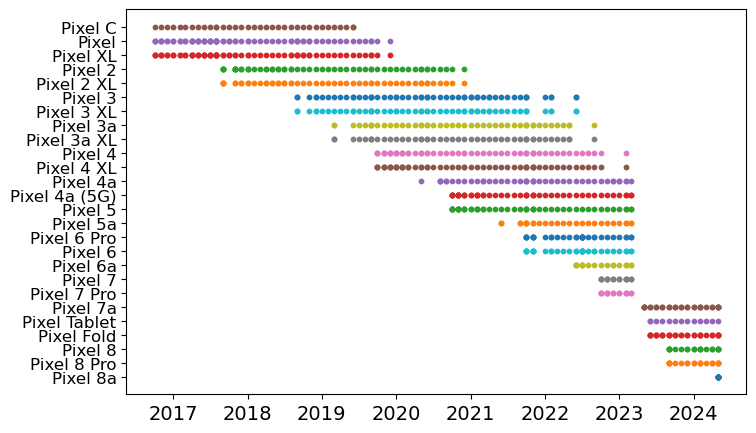

<Figure size 640x480 with 0 Axes>

In [92]:
import matplotlib.dates as mdates
import numpy as np
import matplotlib.pyplot as plt

counter = 0
ticks = []

m = 0
k = 29

for codename in df_ota['codename'].unique()[m:k]:    
    df_test = df_ota[df_ota['codename']==codename]
    
    dates =  df_test[df_test['Date'].notna()]['Date'].to_list()
    
    device = df_test['model'].to_list()[0]

    tick_name = device
    ticks.append(tick_name)
    
    plt.figure(1,figsize=(8, 5))
    plt.scatter(dates, [counter]*len(dates), s=10)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    #plt.gcf().autofmt_xdate()
    plt.yticks(np.arange(len(ticks)), ticks, fontsize=12)
    plt.xticks(fontsize=14,rotation=0)
    #plt.xlabel(xlabel = 'Date',fontsize=16)
    counter = counter + 1

plt.savefig('../2024_Data/Figures/pixel_updates.png', bbox_inches='tight')
plt.show()
plt.tight_layout()

In [93]:
len(df_ota['model'].unique())

45

In [94]:
df_ota['model'].unique()

array(['Pixel 8a', 'Pixel 8 Pro', 'Pixel 8', 'Pixel 9', 'Pixel 10',
       'Pixel 11', 'Pixel 12', 'Pixel 13', 'Pixel 14', 'Pixel 15',
       'Pixel 16', 'Pixel 17', 'Pixel 18', 'Pixel 19', 'Pixel 20',
       'Pixel 21', 'Pixel 22', 'Pixel 23', 'Pixel 24', 'Pixel 25',
       'Pixel 26', 'Pixel 27', 'Pixel Fold', 'Pixel Tablet', 'Pixel 7a',
       'Pixel 7 Pro', 'Pixel 7', 'Pixel 6a', 'Pixel 6', 'Pixel 6 Pro',
       'Pixel 5a', 'Pixel 5', 'Pixel 4a (5G)', 'Pixel 4a', 'Pixel 4 XL',
       'Pixel 4', 'Pixel 3a XL', 'Pixel 3a', 'Pixel 3 XL', 'Pixel 3',
       'Pixel 2 XL', 'Pixel 2', 'Pixel XL', 'Pixel', 'Pixel C'],
      dtype=object)

# 5. LG

In [95]:
import pandas as pd

lg_security_updates = pd.read_csv('../2024_Data/lg/lg_security_updates.csv')
lg_support_lists = pd.read_csv('../2024_Data/lg/lg_support_lists.csv')

android_updates_count = (lg_security_updates['is_android_update'] == True).sum()
lg_security_updates['date'] = pd.to_datetime(lg_security_updates['date'], errors='coerce')
lg_security_updates['spl'] = pd.to_datetime(lg_security_updates['spl'], errors='coerce')

lg_security_updates['delay'] = (lg_security_updates['date'] - lg_security_updates['spl']).dt.days


print('Unique models:', len(set(lg_security_updates['model'])))
print('Total Security Updates:', len(lg_security_updates))
print('Android Security Updates:', android_updates_count)
lg_security_updates.head()

Unique models: 13
Total Security Updates: 197
Android Security Updates: 139


,model,device_name,carrier,region,country,software_version,spl,date,is_android_update,description,url,delay
0,G5,LG G5 T-MOBILE H830,T-Mobile,us,United States,H83030c,2018-09-01,2018-08-01,True,"Android O OS Upgrade, Android Security Update ...",https://www.lg.com/us/support/help-library/lg-...,-31.0
1,G5,LG G5 T-MOBILE H830,T-Mobile,us,United States,H83020o,2018-02-01,2018-02-01,True,Android Security Update (2018-02-01),https://www.lg.com/us/support/help-library/lg-...,0.0
2,G5,LG G5 T-MOBILE H830,T-Mobile,us,United States,H83020n,2017-12-01,2017-12-01,True,"Security Maintenance Release, Android Security...",https://www.lg.com/us/support/help-library/lg-...,0.0
3,G5,LG G5 T-MOBILE H830,T-Mobile,us,United States,H83020c,2017-01-01,NaT,True,"Android Nougat 7.0 Software Update, Android Se...",https://www.lg.com/us/support/help-library/lg-...,NaN
4,G5,LG G5 T-MOBILE H830,T-Mobile,us,United States,H83020a,2016-11-01,NaT,True,"Android Nougat 7.0 Software Update, Android Se...",https://www.lg.com/us/support/help-library/lg-...,NaN


In [96]:
print('=========Queried==========')
print('Total queired devices: {}'.format(len(lg_security_updates['model'].unique())))

print('=========Found==========')
print('Total Updates Found: {}'.format(len(lg_security_updates.index)))
print('Unique Model: {}'.format(len(lg_security_updates['model'].unique())))
print('Unique Device: {}'.format(len(lg_security_updates['device_name'].unique())))
print('Unique Carriers: {}'.format(len(lg_security_updates['carrier'].unique())))
print('First date: {}'.format(lg_security_updates['date'].min()))
print('Last date: {}'.format(lg_security_updates['date'].max()))

=========Queried==========
Total queired devices: 13
=========Found==========
Total Updates Found: 197
Unique Model: 13
Unique Device: 36
Unique Carriers: 6
First date: 2016-12-12 00:00:00
Last date: 2020-08-29 00:00:00


In [97]:
d = []
counter = 0

for url in lg_security_updates['url'].unique():
    df_test = lg_security_updates[lg_security_updates['url']==url]

    device = df_test['model'].to_list()
    device_name = df_test['device_name'].to_list()
    country = df_test['country'].to_list()
    region = df_test['region'].to_list()
    
    update_count = len(df_test)
    
    first_update_date = df_test['date'].min()
    last_update_date = df_test['date'].max()
    support_duration = (last_update_date-first_update_date).days
    update_frequency = support_duration / update_count
    avg_delay = df_test['delay'].median()
    # android_version = df_test.loc[df_test['date']==last_update_date,'android_version'].to_list()
    
    d.append({'device_name': device_name[0],
              'device': device[0],
              'country': country[0],
              'region': region[0],
              # 'last_android_version': android_version[0],
              'update_count': update_count,
              'first_update_date': first_update_date,
              'last_update_date': last_update_date,
              'support_duration': support_duration,
              'update_frequency': update_frequency,
              'delay': avg_delay,
              'url': url,})
    
    counter = counter + 1 
    print('Completed {} / {}'.format(counter,len(lg_security_updates['url'].unique())), end='\r')
    
df_final_lg = pd.DataFrame(d)

df_final_lg.head()

,device_name,device,country,region,update_count,first_update_date,last_update_date,support_duration,update_frequency,delay,url
0,LG G5 T-MOBILE H830,G5,United States,us,6,2017-12-01,2018-08-01,243.0,40.500000,0.0,https://www.lg.com/us/support/help-library/lg-...
1,LG G6 AT&T H871,G6,United States,us,8,2018-01-01,2019-02-01,396.0,49.500000,-30.0,https://www.lg.com/us/support/help-library/lg-...
2,LG G6 H872 T-Mobile Software Update Info,G6,United States,us,7,2017-12-01,2019-01-01,396.0,56.571429,-30.5,https://www.lg.com/us/support/help-library/lg-...
3,LG G6 VS988 Verizon Software Update Info,G6,United States,us,9,2018-02-01,2019-07-24,538.0,59.777778,-14.0,https://www.lg.com/us/support/help-library/lg-...
4,LG G6 US997,G6,United States,us,7,2018-01-01,2019-02-01,396.0,56.571429,-14.0,https://www.lg.com/us/support/help-library/lg-...


In [98]:
df_final_lg[['update_count','support_duration','update_frequency','delay']].mean()

update_count          5.472222
support_duration    384.318182
update_frequency     54.528844
delay                10.725000
dtype: float64

In [99]:
df_final_lg_new= df_final_lg.rename(columns={"url": "id"},inplace=False)

df_final_lg_new[['id','device', 'device_name', 'last_update_date', 'country', 'region']].to_csv('../2024_Data/lg/lg_unpatched_devices.csv',index=False)

# 6. Vivo

In [100]:
import pandas as pd

vivo_security_updates = pd.read_csv('../2024_Data/vivo/vivo_security_updates.csv')
vivo_security_updates['date'] = pd.to_datetime(vivo_security_updates['date'], format='%m/%d/%y', errors='coerce')
vivo_security_updates = vivo_security_updates[vivo_security_updates['date'] < '2024-06-01']

vivo_security_updates['spl'] = pd.to_datetime(vivo_security_updates['spl'], format='%m/%d/%y', errors='coerce')
vivo_security_updates['delay'] = (vivo_security_updates['date'] - vivo_security_updates['spl']).dt.days

vivo_security_updates.head()

,device,firmware_filename,date,file_size,downloads,download_link,link,region,country,spl,post_build,android_version,delay
1,Y03,PD2327F_EX_A_14.0.10.3.W20.V000L1,2024-04-18,4198.4M,810,https://www.vivo.com/id/support/upgradePackage...,https://www.vivo.com/id/support/system-update,id,Indonesia,2024-03-01,vivo/V2333/V2333:14/UP1A.231005.007/compiler03...,Android 14,48.0
2,Y100 5G,PD2341F_EX_A_14.0.8.12.W20.V000L1,2024-04-18,4300.8M,430,https://www.vivo.com/id/support/upgradePackage...,https://www.vivo.com/id/support/system-update,id,Indonesia,2024-03-01,vivo/V2327/V2327:14/UP1A.231005.007/compiler04...,Android 14,48.0
3,Y100,PD2358F_EX_A_14.0.9.4.W20.V000L1,2024-04-18,4096M,140,https://www.vivo.com/id/support/upgradePackage...,https://www.vivo.com/id/support/system-update,id,Indonesia,2024-03-01,vivo/V2342/V2342:14/UP1A.231005.007/compiler04...,Android 14,48.0
4,V30 Pro,PD2332F_EX_A_14.0.8.31.W20.V000L1,2024-04-18,5120M,252,https://www.vivo.com/id/support/upgradePackage...,https://www.vivo.com/id/support/system-update,id,Indonesia,2024-02-01,vivo/V2319/V2319:14/UP1A.231005.007/compiler02...,Android 14,77.0
5,V30,PD2323F_EX_A_14.0.5.5.W20.V000L1,2024-04-18,4812.8M,258,https://www.vivo.com/id/support/upgradePackage...,https://www.vivo.com/id/support/system-update,id,Indonesia,2024-01-01,vivo/V2318/V2318:14/UP1A.231005.007/compiler01...,Android 14,108.0


In [101]:
print('=========Found==========')
print('Total Updates Found: {}'.format(len(vivo_security_updates.index)))
print('Unique Device: {}'.format(len(vivo_security_updates['device'].unique())))
print('Unique Country: {}'.format(len(vivo_security_updates['country'].unique())))

print('First date: {}'.format(vivo_security_updates['date'].min()))
print('Last date: {}'.format(vivo_security_updates['date'].max()))

=========Found==========
Total Updates Found: 287
Unique Device: 71
Unique Country: 40
First date: 2021-03-08 00:00:00
Last date: 2024-04-18 00:00:00


In [102]:
d = []
counter = 0

for url in vivo_security_updates['download_link'].unique():
    df_test = vivo_security_updates[vivo_security_updates['download_link']==url]
    
    device = df_test['device'].to_list()
    country = df_test['country'].to_list()
    region = df_test['region'].to_list()
    
    update_count = len(df_test)
    
    first_update_date = df_test['date'].min()
    last_update_date = df_test['date'].max()
    support_duration = (last_update_date-first_update_date).days
    update_frequency = support_duration / update_count
    avg_delay = df_test['delay'].median()
    android_version = df_test.loc[df_test['date']==last_update_date,'android_version'].to_list()
    
    d.append({'device': device[0],
              'country': country[0],
              'region': region[0],
              'last_android_version': android_version[0],
              'update_count': update_count,
              'first_update_date': first_update_date,
              'last_update_date': last_update_date,
              'support_duration': support_duration,
              'update_frequency': update_frequency,
              'delay': avg_delay,
              'url': url,})
    
    counter = counter + 1 
    print('Completed {} / {}'.format(counter,len(vivo_security_updates['download_link'].unique())), end='\r')
    
df_final_vivo = pd.DataFrame(d)

df_final_vivo.head()

,device,country,region,last_android_version,update_count,first_update_date,last_update_date,support_duration,update_frequency,delay,url
0,Y03,Indonesia,id,Android 14,1,2024-04-18,2024-04-18,0,0.0,48.0,https://www.vivo.com/id/support/upgradePackage...
1,Y100 5G,Indonesia,id,Android 14,1,2024-04-18,2024-04-18,0,0.0,48.0,https://www.vivo.com/id/support/upgradePackage...
2,Y100,Indonesia,id,Android 14,1,2024-04-18,2024-04-18,0,0.0,48.0,https://www.vivo.com/id/support/upgradePackage...
3,V30 Pro,Indonesia,id,Android 14,1,2024-04-18,2024-04-18,0,0.0,77.0,https://www.vivo.com/id/support/upgradePackage...
4,V30,Indonesia,id,Android 14,1,2024-04-18,2024-04-18,0,0.0,108.0,https://www.vivo.com/id/support/upgradePackage...


In [103]:
df_final_vivo[['update_count','support_duration','update_frequency','delay']].mean()


update_count         1.003497
support_duration     0.000000
update_frequency     0.000000
delay               79.925110
dtype: float64

In [104]:
df_final_vivo_new= df_final_vivo.rename(columns={"url": "id"},inplace=False)

df_final_vivo_new[['id','device','last_android_version',
                   'last_update_date', 'country', 'region']].to_csv('../2024_Data/vivo/vivo_unpatched_devices.csv',index=False)

# 7. Huawei

# 8. Motorola

# All OEMs Data Statistics 

In [105]:
import pandas as pd


# Calculate total updates
total_updates = (
    len(df_samsung.index) +
    len(xiaomi_combined.index) +
    len(oppo_security_updates.index) +
    len(df_ota.index) +
    len(lg_security_updates.index) +
    len(vivo_security_updates.index)
)

# Calculate total unique devices
total_devices = (
    len(set(df_samsung['device'])) +
    len(set(xiaomi_combined['codename_short'])) +
    len(set(oppo_security_updates['device'])) +
    len(set(df_ota['Device'])) +
    len(set(lg_security_updates['device_name'])) +
    len(set(vivo_security_updates['device']))
)

# Calculate total unique countries
samsung_countries = set(df_samsung['country'].unique())
oppo_countries = set(oppo_security_updates['country'].unique())
lg_countries = set(lg_security_updates['country'].unique())
vivo_countries = set(vivo_security_updates['country'].unique())
all_country = samsung_countries | oppo_countries | lg_countries | vivo_countries
total_country = len(all_country)

# Calculate total unique carriers
samsung_carrier = set(df_samsung['carrier'].unique())
lg_carrier = set(lg_security_updates['carrier'].unique())
all_carrier = samsung_carrier | lg_carrier
total_carrier = len(all_carrier)

# Print the results
print(f'Total security updates: {total_updates}')
print(f'Total unique devices: {total_devices}')
print(f'Total countries: {total_country}')
print(f'Total carriers: {total_carrier}')
print('All Countries:\n', all_country)
print('All Carriers:\n', all_carrier)

Total security updates: 548463
Total unique devices: 903
Total countries: 107
Total carriers: 111
All Countries:
 {'Colombia', 'Chile', 'Tunisia', 'Libya', 'Belarus', 'Kazakhstan', 'New Zealand', 'Norway', 'Tajikistan', 'Ecuador', 'USA', 'Hong Kong', 'Trinidad and Tobago', 'Ireland', 'Korea', 'Jordan', 'Myanmar', 'Russia', 'Sri Lanka', 'Nepal', 'India', 'United Arab Emirates', 'Papua New Guinea', 'Guatemala', 'Portugal', 'Ukraine', 'Caucasus Countries', 'Mexico', 'Romania', 'Morocco', 'Pakistan', 'Azerbaijan', 'UAE', 'United Kingdom', 'Puerto Rico', 'Global Certification Forum', 'Peru', 'Austria', 'Macedonia', 'Algeria', 'Nordic countries', 'El Salvador', 'Vietnam', 'Kenya', 'Malaysia', 'Costa Rica', 'Brazil', 'Bolivia', 'Fiji', 'Kyrgyzstan', 'United States', 'Serbia', 'Netherlands', 'Luxembourg', 'Switzerland', 'Thailand', 'Greece', 'Jamaica', 'Afghanistan', 'China', 'Paraguay', 'South Africa', 'Canada', 'Iran', 'Philippines', 'Dominican Republic', 'Panama', 'Bulgaria', 'Taiwan', 'Sou

In [106]:
unique_countries = [
    'Bolivia', 'Philippines', 'Belarus', 'Chile', 'Netherlands', 'Trinidad and Tobago',
    'Paraguay', 'Ukraine', 'New Zealand', 'Italy', 'Portugal', 'Brazil', 'Mauritius',
    'Russia', 'Albania', 'Jamaica', 'Canada', 'Kazakhstan', 'Romania', 'Hungary', 'Kenya',
    'Tajikistan', 'Puerto Rico', 'Pakistan', 'Dominican Republic', 'Myanmar',
    'United Arab Emirates', 'Ireland', 'Australia', 'Bulgaria', 'Zambia', 'Slovakia',
    'Sweden', 'Peru', 'Montenegro', 'Papua New Guinea', 'Taiwan', 'Vietnam', 'Azerbaijan',
    'Serbia', 'Saudi Arabia', 'Cambodia', 'Honduras', 'Libya', 'Israel', 'Turkey', 'Laos',
    'Slovenia', 'Thailand', 'Korea', 'Iraq', 'Uzbekistan', 'Morocco', 'Egypt', 'Luxembourg',
    'Macedonia', 'Norway', 'Costa Rica', 'Austria', 'Sri Lanka', 'Tunisia', 'Kyrgyzstan',
    'China', 'Guatemala', 'Malaysia', 'Jordan', 'El Salvador', 'Afghanistan',
    'Bosnia and Herzegovina', 'Cyprus', 'Indonesia', 'Germany', 'Ecuador', 'Hong Kong',
    'Spain', 'United Kingdom', 'Belgium', 'Iran', 'France', 'Poland', 'South Africa',
    'Nepal', 'Bangladesh', 'Panama', 'Japan', 'Fiji', 'Argentina', 'India', 'Nigeria',
    'Switzerland', 'Greece', 'Czech Republic', 'Colombia', 'Singapore', 'Uruguay', 'Croatia',
    'Algeria', 'Mexico'
]

unique_carriers = [
    'Orange', 'Bouygues', 'Nextel', 'A1', 'Comcel', 'Cricket', 'China Telecom',
    'Nextech / C-Spire', 'Belarus', 'Verizon', 'Telstra', 'SingTel', 'STC',
    'EastLink', 'Telefonica', 'SaskTel', 'Vodafone', 'Tre', 'Unbranded',
    'Unbranded/Unlocked', 'Moviestar', 'Bonbon', 'Swisscom', 'Virgin Mobile',
    'Rogers', 'O2', 'Play', 'Globalive Wind Mobile', 'Koodo Mobile', 'Claro',
    'Sprint', 'O2C', 'Cable & Wireless', 'US Cellular', 'SK Telecom', 'VIPNET',
    'TPH', 'Open Line', 'Si', 'LG Uplus', 'Telus', 'PAK', 'VIP', 'Xfinity Mobile',
    'Videotron', 'Sun Cellular', 'Movistar', 'Wind', 'T-mobile', 'Bluegrass Cellular',
    'BH TELECOM', 'TIM', 'MetroPCS', 'Entel PCS', 'Optus', 'Cellular South',
    'StarHub', 'Proximus', 'VVT', 'MTN Zambia', 'KT Corporation', 'Mobitel',
    'AT&T', 'Congstar', 'VTR', 'Telekom', 'Three', 'H3G', 'ETB', 'Cosmote',
    'T-Mobile', 'MTL', 'SFR', 'China Mobile', 'EE', 'Telering', 'SAM',
    'Bell Mobile', 'Telcel', 'Telenor', 'PLUS', 'Meteor', 'Cellcom', 'Heyah',
    'MAT', 'Personal', 'Tigo', 'Kyivstar', 'Oi', 'Viettel', 'Spectrum Mobile',
    'Orange/Partner', 'Optimus', 'Boost Mobile', 'VIVO', 'MWD', 'Globe',
    'Tracfone', '3 Hutchison', 'Ben NL', 'Fido Mobile', 'Open', 'Pelephone',
    'TELE2', 'Smart', 'Open China', 'Cytamobile Vodafone', '1&1', 'Chatr Mobile'
]


print('Total unique countries:', len(unique_countries))
print('Total unique carriers:', len(unique_carriers))

Total unique countries: 98
Total unique carriers: 109
